## 1. Loading the dataset

In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
# reading the csv file
data = pd.read_csv('image.csv')

In [ ]:
#upload to drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip /content/new.zip

Archive:  /content/new.zip
   creating: new/
  inflating: new/001-12.jpg          
  inflating: new/001-16.jpg          
  inflating: new/002-125.jpg         
  inflating: new/002-99.jpg          
  inflating: new/7001-21.jpg         
  inflating: new/7001-27.jpg         
  inflating: new/7002-9.jpg          
  inflating: new/7070-211.jpg        


In [ ]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
# looking at first five rows of the data
data.head()

,image_name,crack or not
0,002-99.jpg,1
1,002-125.jpg,1
2,7001-27.jpg,1
3,7002-9.jpg,1
4,7070-211.jpg,1


In [ ]:
data

,image_name,crack or not
0,002-99.jpg,1
1,002-125.jpg,1
2,7001-27.jpg,1
3,7002-9.jpg,1
4,7070-211.jpg,1
5,001-12.jpg,0
6,001-16.jpg,0
7,7001-21.jpg,1


In [ ]:
# distribution of classes in the dataset
data['crack or not'].value_counts()

1    6
0    2
Name: crack or not, dtype: int64

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_name:
    # loading the image using its name
    img = plt.imread('/content/new/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data['crack or not'].values

In [ ]:
# shape of the image
X.shape

(8, 256, 256, 3)

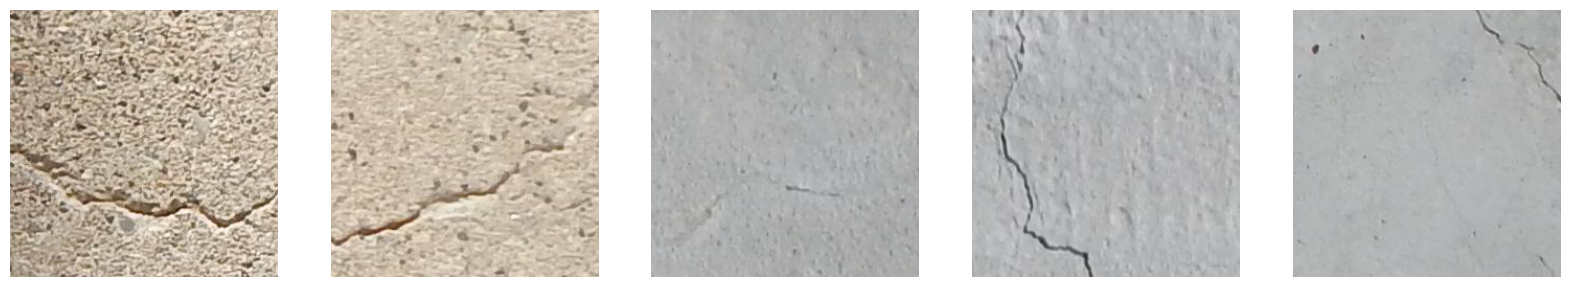

In [ ]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*1])
    ax[i].axis('off')

## 2. Pre-processing the data

![alt text](https://drive.google.com/uc?id=1qrMvsKOgTmo4Zt93r8G84Z5I_2IfVduq)

In [ ]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 256*256*3)
X.shape

(8, 196608)

In [ ]:
# minimum and maximum pixel values of images
X.min(), X.max()

(1, 255)

In [ ]:
# normalizing the pixel values
X = X / X.max()

In [ ]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.00392156862745098, 1.0)

## 3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((5, 196608), (5,)), ((3, 196608), (3,)))

## 4. Defining the model architecture

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               19660900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 19,661,001
Trainable params: 19,661,001
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the model

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.8078 - accuracy: 0.2000 - val_loss: 1.7877 - val_accuracy: 0.6667
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 1.0953 - accuracy: 0.8000 - val_loss: 1.7425 - val_accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 1.0668 - accuracy: 0.8000 - val_loss: 1.7051 - val_accuracy: 0.6667
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 1.0431 - accuracy: 0.8000 - val_loss: 1.6654 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 1.0183 - accuracy: 0.8000 - val_loss: 1.6103 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 0.9755 - accuracy: 0.8000 - val_loss: 1.5651 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.9487 - accuracy: 0.8000 - val_loss: 1.5294 - val_accuracy: 0.6667
Epoch 8/50
1/1 [=============

## 7. Evaluating model performance

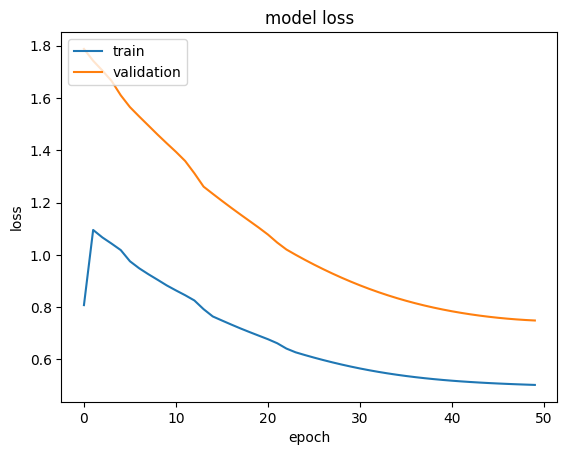

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_name.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('untitled folder/' + img_name)

# print probability and actual class
#print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

NameError: ignored